[View in Colaboratory](https://colab.research.google.com/github/anair3007/machine-learning-notebooks/blob/master/naive_bayes_classifier.ipynb)

## Breast Cancer Malignancy Classifier

The dataset consists of 699 cells for which you have the following features:

Sample code number: id number  
Clump Thickness: 1 - 10  
Uniformity of Cell Size: 1 - 10  
Uniformity of Cell Shape: 1 - 10  
Marginal Adhesion: 1 - 10  
Single Epithelial Cell Size: 1 - 10  
Bare Nuclei: 1 - 10  
Bland Chromatin: 1 - 10  
Normal Nucleoli: 1 - 10  
Mitoses: 1 - 10  
Class: (2 for benign, 4 for malignant)

The dataset is also available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

### Data Import

In [5]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}

plt.rcParams.update(params)

df = pd.read_csv("breast-cancer-wisconsin.csv", header=None);
df.columns = ['id','clump_thickness',
              'uniform_size',
              'uniform_shape',
              'adhesion',
              'cell_size',
              'bare_nuclei',
              'chromatin',
              'norm_nuclei',
              'mitoses',
              'malignant']

df['malignant'] = (df['malignant']-2)/2
df.head()

,id,clump_thickness,uniform_size,uniform_shape,adhesion,cell_size,bare_nuclei,chromatin,norm_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


### Data Cleaning
The column "bare_nuclei" contains some question marks, which casts the column as strings. We impute these missing values using the median of bare_nuclei (which is 1) and convert the column to numeric.

In [7]:
try:
    bn_med = np.median(df['bare_nuclei'] != '?')
    df['bare_nuclei'] = df['bare_nuclei'].replace("?", bn_med)
    df['bare_nuclei'] = df['bare_nuclei'].apply(pd.to_numeric)
except:
    pass
df = df.astype(int)
df.head()

,id,clump_thickness,uniform_size,uniform_shape,adhesion,cell_size,bare_nuclei,chromatin,norm_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


### Check Correlations

Here we notice that uniformity_shape and uniformity_size are very strongly correlated with one another. In this case, if we were recommending something to the client, we could say you don't need to measure both in order to predict malignancy.

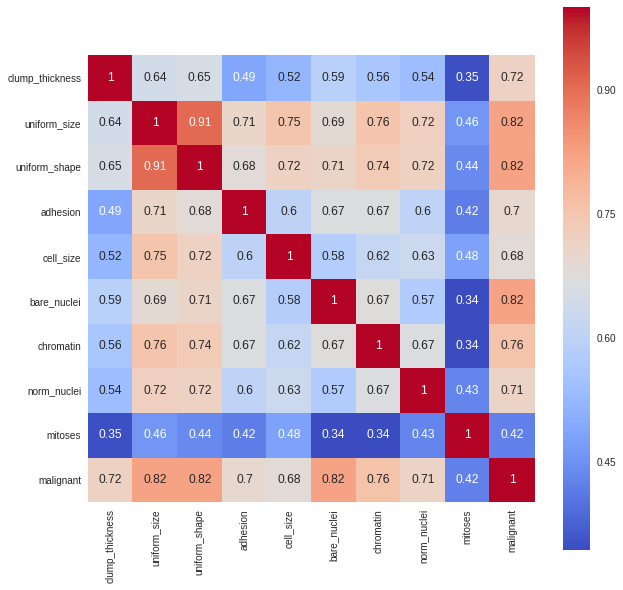

In [8]:
feature_names = list(df.columns)
label_name = list(df.columns[10:])

features = df[feature_names[1:11]]
labels = df[label_name]
plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

### Check Histograms of Each Feature for Classes
Here we can see that some features have a good separation and are visibly distinct.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


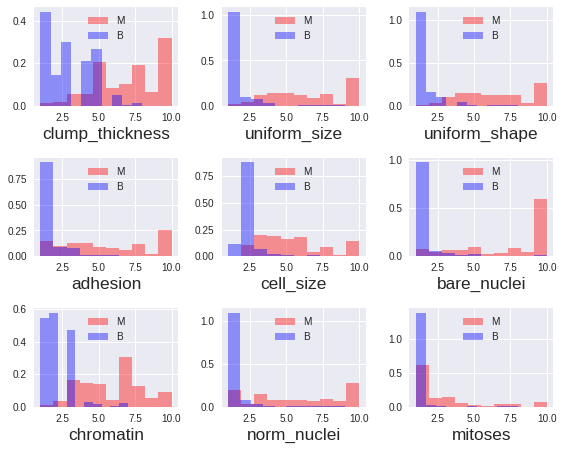

In [9]:
bins = 10
cols = 3
rows = np.ceil( len(feature_names) / cols )

fig = plt.figure(figsize=(8,8))

for i, feature in enumerate(feature_names[1:-1]):
    
    fig.add_subplot(rows, cols, i+1)
    
    sns.distplot(df[df['malignant']==1][feature], 
                 bins=bins,
                 norm_hist=True,
                 kde=False,
                 color='red',
                 label='M');
    
    sns.distplot(df[df['malignant']==0][feature], 
                 bins=bins,
                 norm_hist=True,
                 kde=False,
                 color='blue',
                 label='B');
    
    plt.legend(loc='upper center')

fig.tight_layout()
fig.show()

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
features_selection = feature_names[:-1]
X = df.loc[:,features_selection]
y = df.loc[:, 'malignant']

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


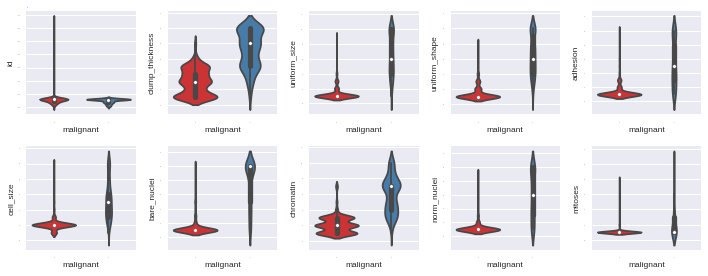

In [11]:
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
         'axes.labelsize': "x-small",
         'axes.titlesize':0,
         'xtick.labelsize':0,
         'ytick.labelsize':0}

plt.rcParams.update(params)
plt.figure(figsize=(10,4))
rows=2
cols=5
for i, feature in enumerate(feature_names[:-1]):    
    plt.subplot(rows, cols, i+1)
    
    sns.violinplot(x=df['malignant'], y=df[feature], palette="Set1")

plt.tight_layout()
plt.show()

In [14]:
# Evaluate using a train and a test set
test_size = 0.33
seed = 70
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test
result = model.score(X_test, y_test)
print("Test Size: ",test_size,"\nAccuracy: ",result)

print("F1: ",f1_score(expected, predicted, average="macro"))
print("Precision: ",precision_score(expected, predicted, average="macro"))
print("Recall: ",recall_score(expected, predicted, average="macro"))   

Test Size:  0.33 
Accuracy:  0.8528138528138528
F1:  0.8180259499536607
Precision:  0.8777395788568974
Recall:  0.7946204122674712


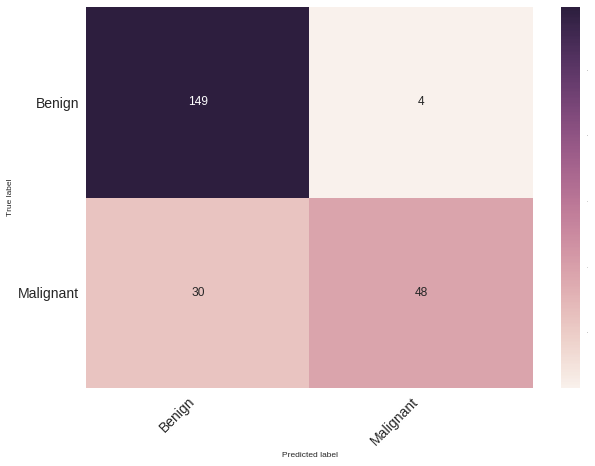

In [17]:
mat = confusion_matrix(expected, predicted)
print_confusion_matrix(mat, ['Benign','Malignant']);

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize);
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d");
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize);
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize);
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    return fig